## Data Exploratory Analysis

In [1]:
import pandas as pd

df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset

- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

#### Total number of actions

In [2]:
print('The total number of actions: ', df.shape[0])

The total number of actions:  8188


#### Number of unique users

In [3]:
print( 'The total number of unique users: ', df.nunique()[1])

The total number of unique users:  6328


In [4]:
df.groupby('group').nunique()

,timestamp,id,group,action
group,,,,
control,4264,3332,1,2
experiment,3924,2996,1,2


In [5]:
group = df.groupby('group').nunique()
print('size of control group: ', 3332)
print('size of experiment group: ', 2996)

size of control group:  3332
size of experiment group:  2996


### 2. How long was the experiment run for ?

In [6]:
df['timestamp'] = pd.to_datetime(df.timestamp)

In [7]:
running_time = df.timestamp.loc[8187] - df.timestamp.loc[0]
print('The experiment was running for {} time'.format(running_time))

The experiment was running for 115 days 16:41:40.789831 time


### 3. The action type for the data set

In [8]:
df.action.value_counts()

view     6328
click    1860
Name: action, dtype: int64

In [9]:
experiemnt_type = df.action.value_counts()
print('As we can see, we have {} view type \t\n \n and {} click type'.format(experiemnt_type[0], experiemnt_type[1]))

As we can see, we have 6328 view type 	
 
 and 1860 click type


### 4. Why we use the CTR

Because we have cookie, we can track each individual.
    - The control and experiment pages could have different numbers of total visitors.
    - More total clicks could occur in one version, even if there is a great percentage of clicks in the other version

**In all, getting proportion of the users who click is more effective than getting the number of users who click when comparing groups of different sizes**

### 5. Define CTR for this experiment

**The number of unique visitors who click at least once divided by the number of unique visitors who view the page**

In [10]:
df.query('action == "click"').id.nunique() / df.query('action == "view"').id.nunique()

0.2939317319848293

In [11]:
experiment_df = df.query('group == "experiment"')

**Click through rate for the experiment group**

In [20]:
CLR_experiment = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
CLR_experiment

0.3097463284379172

**Click through rate for the control group**

In [21]:
control_df = df.query('group == "control"')
CLR_control = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
CLR_control

0.2797118847539016

In [25]:
print('The difference between two groups of CLR:',  (CLR_experiment - CLR_control) * 100, '%')

The difference between two groups of CLR: 3.0034443684015644 %


In [34]:
obs_diff = CLR_experiment - CLR_control

### 6. Hypothesis test and p-value

**Bootstramp the sample to test statistics**

In [26]:
diffs = []

for _ in range(10000):
    # use bootstrap technique here
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

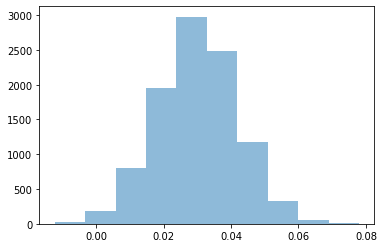

In [29]:
import matplotlib.pyplot as plt

plt.hist(diffs, alpha=0.5)
plt.show()

**simulating the p-value**

In [30]:
import numpy as np
null_vals = np.random.normal(0, np.std(diffs), 10000)

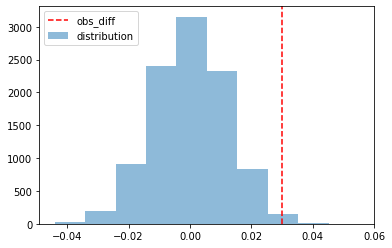

In [37]:
plt.hist(null_vals, alpha=.5)
plt.axvline(x=obs_diff, ls='dashed', c='r')
plt.legend(['obs_diff','distribution'])
plt.show()

**P-value here**

In [38]:
(null_vals > obs_diff).mean()

0.0052

**Conclusion: Since the p-value = 0.5 % < 1 % , as such, we need to reject the Null Hypothesis. That is to say, we should launch the new version of the website**